Q1: Using your laptop/desktop webcam, create a video that contains the background for the
first few seconds followed by your entry in the video.

In [12]:
import cv2 # First I'll import the OpenCV library

In [13]:
a = cv2.VideoCapture(0)  # initiate Video Capture from our Webcam
img_array = []
while True:  # While video is being captured,
    check, frame = a.read()  # we'll read the frames captured
    
    height, width, layers = frame.shape   # calculate the dimensions of the frames
    size = (width,height)
    img_array.append(frame)  # append the frame to the image array we defined earlier
 
 
    out = cv2.VideoWriter('my_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)  # we'll then create a VideoWriter instance and set file name to project.avi
    for i in range(len(img_array)):
        out.write(img_array[i])   # We'll thn write out the frames stored in the image array
    
    
    cv2.imshow("Image",frame)
    key=cv2.waitKey(1)
    if key==ord('q'):
        break

out.release()
a.release()
cv2.destroyAllWindows()

In [ ]:
# looking at the file directory, we see that a video file was created..

Q2:  Perform Bacground Substitution on the images of the provided dataset

In [1]:
# we import the libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import sys
import cv2

# (go to Background Substitution part to explain next)

In [2]:
def initBackground(initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr
    variance = 9*np.ones(img_arr.shape)
    return(mean,variance)

In [3]:
def ForegroundDetection(img_file,mean,variance,lmda):
    img = cv2.imread(img_file)
    d = img - mean
    y = variance*(lmda**2)
    d_2 = np.square(d)
    I = d_2 - y
    mask = np.all(I>0,axis=2)
    rI = 255*mask.astype(int)
    rI = rI.astype(np.uint8)
    return(rI)

In [4]:
def Voting(rI,eta,m,n):
    r,c = rI.shape
    cI = np.zeros((rI.shape[0],rI.shape[1]))
    for i in range(m,r-1-m):
        for j in range(n,c-1-n):
            img_patch = rI[i-m:i,j-n:j]
            y_unq, counts = np.unique(img_patch,return_counts=True)
            if len(counts) == 1 and y_unq[0] == 1:
                cI[i,j] = 255
            if len(counts)>1:
                if counts[1] > eta*m*n: # Threshold
                    cI[i,j] = 255
    cI = cI.astype(np.uint8)
    return cI

In [5]:
def meanvarUpdate(cI,img_path,M,V,alpha):
    img = mpimg.imread(img_path)
    mean_upd = np.zeros(img.shape)
    var_upd = np.zeros(img.shape)
    d = img - M
    d_2 = np.square(d)
    for i in range(cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] == 0:
                mean_upd[i,j,:] = (1-alpha)*M[i,j,:]+alpha*img[i,j,:]
                var_upd[i,j,:] = (1-alpha)*(V[i,j,:]+alpha*d_2[i,j,:])
                var_upd[i,j,:] =np.clip(var_upd[i,j,:],a_min = 9, a_max = None)
    return(mean_upd,var_upd)

In [6]:
def Background_Substraction(img_dir,lmda,eta,m,n,alpha): # we've defined the BackSub function that uses other functions for the process
    img_file_name = os.listdir(img_dir)  # stores a list of file names present in the specified img_dir
    initImage = os.path.join(img_dir,img_file_name[0]) #we store the path and file name of the first image
    mean, variance = initBackground(initImage) #and initialize that image as background. This func returns mean and variance of the image
    
    for i in range(1,19): # now that the background has been defined, we proceed towards finding any change in consecutive images
        img_path = os.path.join(img_dir,img_file_name[i]) 
        fig,ax = plt.subplots(1,3,figsize=(10,10))
        rI = ForegroundDetection(img_path,mean,variance,lmda) # so for the next file we use this function (defined earlier) to detect any changes
        ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n) # we remove noise in the image by the Voting function (defined earlier)
        mean, variance = meanvarUpdate(cI,img_path,mean,variance,alpha) # then we proceed towards mean var update so that the 
                                                                        #current image becomes the new background. This is known as Background Substitution.
        ax[1].imshow(cI,cmap = "gray")
        
        img = cv2.imread(img_path)
        ax[2].imshow(img,cmap="gray")
        
        plt.show()        # we thus plot the noisy forground detected image, the de-noised fg image and the actual image
    return(mean,variance)

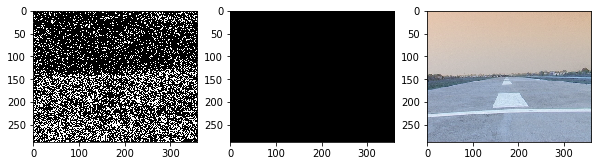

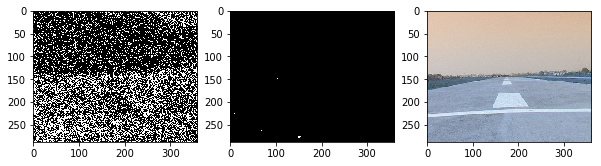

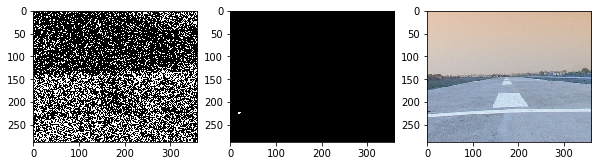

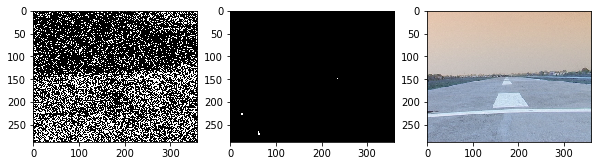

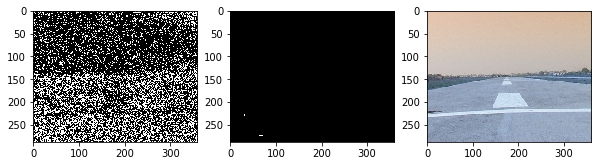

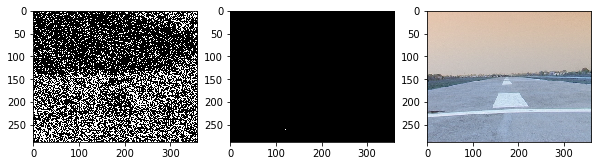

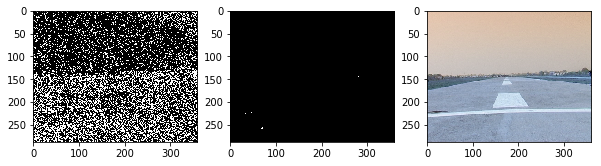

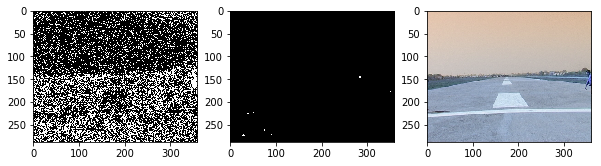

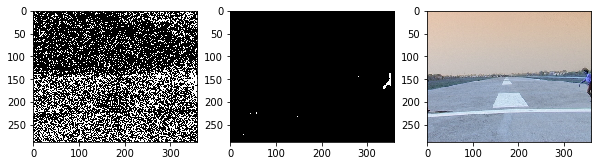

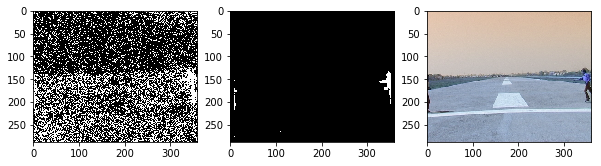

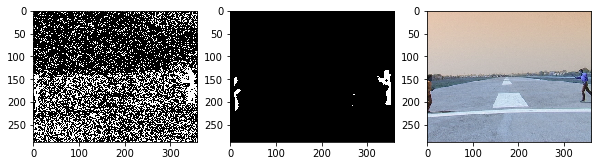

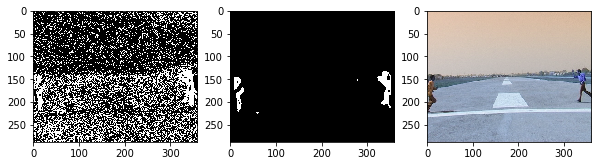

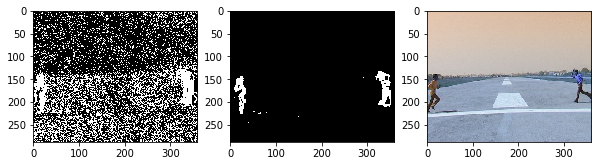

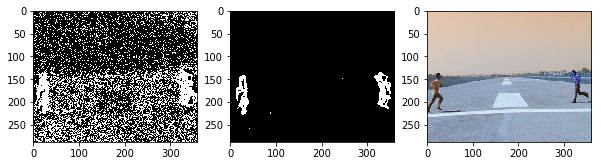

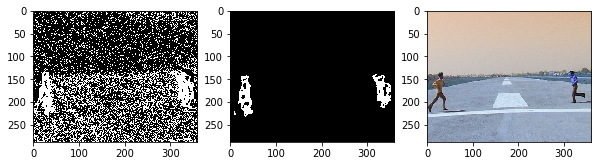

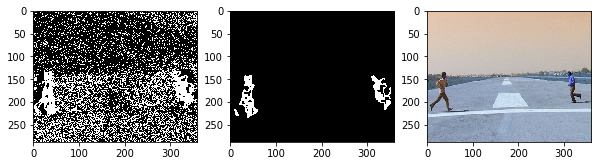

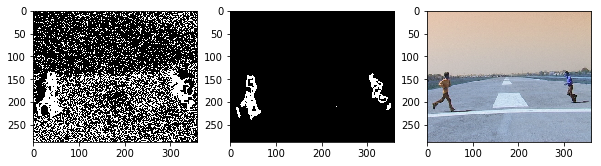

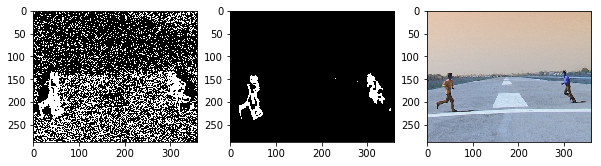

In [14]:
mean, variance = Background_Substraction("./AirStripVideo/Images",0.8,0.7,8,8,0.8) #lambda = 0.8, eta = 0.7

In [ ]:
# we'll update the BackSUb function to see the effect of change of lambda and eta parameters on a single image (no. 20)

In [7]:
def Background_Substraction(img_dir,lmda,eta,m,n,alpha):
    img_file_name = os.listdir(img_dir)
    initImage = os.path.join(img_dir,img_file_name[0])
    mean, variance = initBackground(initImage)
    
    for i in range(20,21):
        img_path = os.path.join(img_dir,img_file_name[i])
        fig,ax = plt.subplots(1,3,figsize=(10,10))
        rI = ForegroundDetection(img_path,mean,variance,lmda)
        ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n)
        mean, variance = meanvarUpdate(cI,img_path,mean,variance,alpha)
        ax[1].imshow(cI,cmap = "gray")
        
        img = cv2.imread(img_path)
        ax[2].imshow(img,cmap="gray")
        
        plt.show()
    return(mean,variance)

In [ ]:
# For eta = 0.7, lambda = 0.7

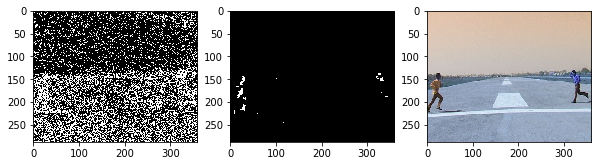

In [10]:
mean, variance = Background_Substraction("./AirStripVideo/Images",0.7,0.7,8,8,0.8)

In [ ]:
# For eta = 0.9, lambda = 0.7

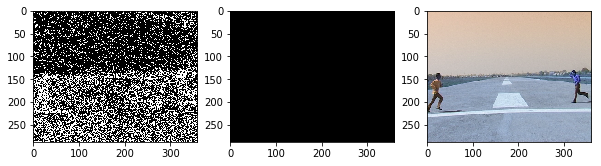

In [22]:
mean, variance = Background_Substraction("./AirStripVideo/Images",0.7,0.9,8,8,0.8)

In [ ]:
# eta is the parameter for noise removal so we see from above middle image that eta = 0.9 is not a good parameter.

In [ ]:
# For eta = 0.7, lambda = 0.9

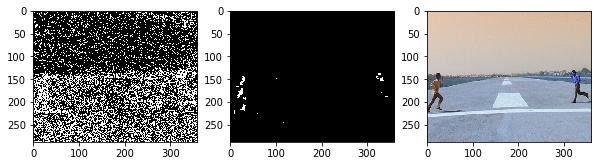

In [23]:
mean, variance = Background_Substraction("./AirStripVideo/Images",0.9,0.7,8,8,0.8)

In [8]:
# lambda is used for foreground detection. we dont see any significant changes for lambda = 0.9